In [6]:
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seffaflik
from seffaflik.elektrik import uretim

In [7]:
seffaflik.Kimlik(istemci_taniticisi="berkay")

In [15]:
vars_to_use = ['Doğalgaz', 'Toplam']

In [10]:
df = uretim.gerceklesen(baslangic_tarihi='2021-06-01', bitis_tarihi='2021-06-15')

In [11]:
df.columns

Index(['Tarih', 'Saat', 'Doğalgaz', 'Barajlı', 'Linyit', 'Akarsu',
       'İthal Kömür', 'Rüzgar', 'Güneş', 'Fuel Oil', 'Jeo Termal',
       'Asfaltit Kömür', 'Taş Kömür', 'Biyokütle', 'Nafta', 'LNG',
       'Uluslararası', 'Toplam'],
      dtype='object')

In [16]:
df_set = df[vars_to_use]
df_set = df_set.rename(columns={'Doğalgaz':'natural gas production',
                                'Toplam':'total production'})

In [17]:
df_set.head(2)

,natural gas production,total production
0,12671.91,33292.52
1,12308.50,31811.94


<AxesSubplot:xlabel='natural gas production', ylabel='total production'>

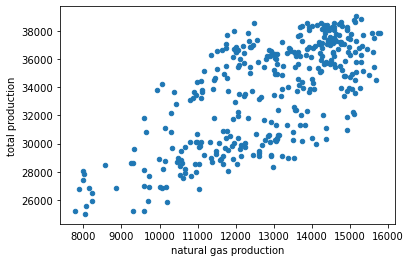

In [20]:
df_set.plot(kind='scatter', x='natural gas production', y='total production')

In [21]:
df_set.corr()

,natural gas production,total production
natural gas production,1.00000,0.70928
total production,0.70928,1.00000


In [22]:
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df_set)

In [28]:
df_set.columns

Index(['natural gas production', 'total production'], dtype='object')

In [29]:
X = df_norm[:,0].reshape(-1,1)
y = df_norm[:,1].reshape(-1,1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

In [68]:
# degree 1 of polynomial might equal linear line
polyreg = make_pipeline(PolynomialFeatures(degree=1), LinearRegression())

In [69]:
polyreg.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression())])

In [70]:
y_pred = polyreg.predict(X_test)

In [71]:
df_model = pd.DataFrame({'y_test':y_test.flatten(),
                         'y_pred':y_pred.flatten()})

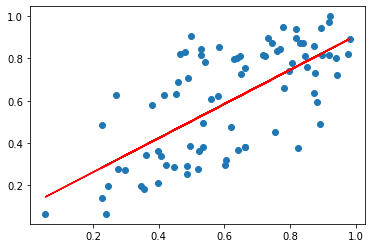

In [72]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')

In [66]:
y_pred.shape

(80, 1)

In [67]:
y_test.shape

(80, 1)